In [51]:
# basic imports
import pandas as pd
import numpy as np

In [52]:
# statistical imports
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy.stats import mannwhitneyu


In [53]:
# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [54]:
PAL = 'RdBu'

### Read in drug and virus signatures, effective drugs and preparing for analysis

In [55]:
lm_genes = pd.read_csv('../data/drug_signatures/signatures_lm_gene.csv', index_col=0)
bing_genes = pd.read_csv('../data/drug_signatures/signatures_bing_gene.csv', index_col=0)

In [56]:
virus_signatures = pd.read_csv('../results/microarray_and_rnaseq_expression.csv', index_col=0)

In [59]:
chembl_drugs = pd.read_csv('../results/drugs/chembl_drugs.csv', sep=',', header=0, index_col=0)
effective_drugs = chembl_drugs['0'].values

In [60]:
samples = ['GSE147507.S5_A549_SARS.CoV.2','GSE147507.S7_Calu3_SARS.CoV.2','GSE148729_Calu3_SARS.CoV.2_24H']


### Calculation of similarities

In [61]:
def calculate_similarity(drug_signatures, virus_signatures):
    correlation_df = pd.DataFrame(columns=drug_signatures.columns, index=virus_signatures.columns)
    genes = set(drug_signatures.index)&set(virus_signatures.index)
    drugs = drug_signatures.loc[genes]
    samples = virus_signatures.loc[genes]
    
    for drug in drugs.columns:
        for sample in samples.columns:
            correlation = spearmanr(drugs.loc[:,drug], samples.loc[:,sample])
            correlation_df.loc[sample, drug] = correlation[0]       
               
    return correlation_df

In [62]:
# This takes some minutes
# Calculating similarity (Spearman's correlation) between drugs and infection signatures
similarities_lm_genes = calculate_similarity(lm_genes, virus_signatures)
similarities_bing_genes = calculate_similarity(bing_genes, virus_signatures)

In [63]:
# Saving similaritiy values
similarities_lm_genes.to_csv('../results/drug_signatures/similarities_lm_genes.csv')
similarities_bing_genes.to_csv('../results/drug_signatures/similarities_bing_genes.csv')


# Similarities in case of effective and all drugs

In [64]:
similarity = pd.read_csv('../results/drug_signatures/similarities_lm_genes.csv', sep=',', header=0, index_col=0)


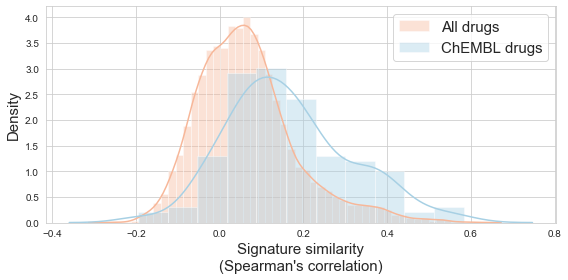

Mannwhitneyu Result: statistic = 574013.5  p-value = 5.019e-18


In [65]:
plt.figure(figsize=(8,4), tight_layout = True)
sns.set_palette(PAL, 2)
# all drugs
sns.distplot(similarity.loc[samples].values.reshape((1,-1))[0])
# chembl drugs
sns.distplot(similarity.loc[samples, effective_drugs].values.reshape((1,-1))[0])
plt.legend(['All drugs','ChEMBL drugs'], fontsize = 15)

plt.xlabel("Signature similarity\n(Spearman's correlation)", size=15)
plt.ylabel('Density', size=15)
plt.show()


stat = mannwhitneyu(similarity.loc[samples].values.reshape((1,-1))[0],
            similarity.loc[samples,effective_drugs].values.reshape((1,-1))[0])
print('Mannwhitneyu Result: statistic =', stat[0], ' p-value =', '{:.3e}'.format(stat[1]))

# ROC analysis

In [66]:
similarity = pd.read_csv('../results/drug_signatures/similarities_lm_genes.csv', sep=',', header=0, index_col=0)

### Similarity-based predictions of effective drugs against SARS-CoV-2

In [67]:
similarity.loc[samples]

,AT1-SHH-09,dexamethasone-acetate,MW-SHH-97,pancuronium,L-2167,CGP-52432,oxantel,thiazolidinecarboxylic-acid,buddleoflavonoloside,"16,16-dimethylprostaglandin-e2",...,SNS-314,corynanthine,LY-288513,avicin-d,dinoprostone,SA-247714,chromomycin-a3,cytarabine,imperatorin,kawain
GSE147507.S5_A549_SARS.CoV.2,0.099674,0.074382,0.138820,0.130984,-0.177711,-0.100490,0.075925,0.155277,0.075881,0.068792,...,0.198619,0.108456,-0.044965,0.223755,0.021597,0.328318,0.070087,0.157138,-0.043639,0.096872
GSE147507.S7_Calu3_SARS.CoV.2,0.110119,0.065690,0.126166,0.179664,-0.172619,-0.085959,0.149658,0.181508,0.156582,0.153996,...,0.251698,0.157746,-0.032342,0.322807,0.093256,0.268878,-0.086525,0.125483,-0.074879,0.086670
GSE148729_Calu3_SARS.CoV.2_24H,0.055370,0.082477,0.025305,0.085543,-0.033284,-0.032965,0.114217,0.051053,0.139380,0.133191,...,0.106798,0.085068,-0.013088,0.244766,0.116811,0.069007,-0.177152,0.070885,-0.033164,0.044965


In [68]:
sample_names = ['GSE147507 A549', 'GSE147507 Calu-3', 'GSE148729 Calu-3']

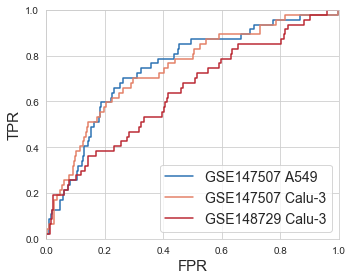

In [77]:
plt.figure(figsize=(5,4))
# sns.set_palette(PAL, 3)
sns.set_palette(sns.color_palette(['#2a71b2', '#e48066', '#ba2832']))
i = 0
rocaucs_viruses = {}

for sample in samples:
    y_pr = similarity.loc[sample]
    y_tr = pd.Series(0, index=similarity.columns)
    y_tr[effective_drugs] = 1
    fpr, tpr, dummy = roc_curve(y_true=y_tr, y_score=y_pr)
    plt.plot(fpr, tpr, label=sample)
    
    # saving ROC AUC values
    rocaucs_viruses[sample_names[i]] = roc_auc_score(y_score=y_pr, y_true=y_tr)
    i = i+1
    
    plt.xlabel('FPR', fontsize=15)
    plt.ylabel('TPR',  fontsize=15)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    
    plt.legend(sample_names, fontsize = 14)
    plt.tight_layout()

In [70]:
pd.DataFrame.from_dict(rocaucs_viruses, orient='index').rename(columns={0:'ROC AUC'})\
.sort_values(by=['ROC AUC'], ascending = False).round(3)

,ROC AUC
GSE147507 A549,0.747
GSE147507 Calu-3,0.741
GSE148729 Calu-3,0.641


### Similarity-based predictions of effective drugs against other viruses

In [71]:
other_samples = ['GSE33267_Calu3_SARS.CoV', 'GSE148729_Calu3_SARS.CoV_24H', 'GSE45042_Calu3_MERS',
                 'GSE56677_Calu3_MERS', 'GSE147507.S3_A549_RSV', 'GSE147507.S8_A549_RSV', 
                'GSE28166_Calu3_H5N1', 'GSE37571_Calu3_Influenza', 'GSE147507.S8_A549_HPIV']

In [72]:
other_names = ['GSE33267 Calu-3 SARS-CoV', 'GSE148729 Calu-3 SARS-CoV','GSE45042 Calu-3 MERS',
               'GSE56677 Calu-3 MERS', 'GSE147507 S3 A549 RSV', 'GSE147507 S8 A549 RSV', 
               'GSE28166 Calu-3 H1N1', 'GSE37571 Calu-3 Infuenza', 'GSE147507 S8 A549 HPIV']

In [73]:
similarity.loc[other_samples]

,AT1-SHH-09,dexamethasone-acetate,MW-SHH-97,pancuronium,L-2167,CGP-52432,oxantel,thiazolidinecarboxylic-acid,buddleoflavonoloside,"16,16-dimethylprostaglandin-e2",...,SNS-314,corynanthine,LY-288513,avicin-d,dinoprostone,SA-247714,chromomycin-a3,cytarabine,imperatorin,kawain
GSE33267_Calu3_SARS.CoV,0.100608,0.062667,0.089331,0.107913,-0.082800,-0.080970,0.093087,0.098388,0.107866,0.145697,...,0.180468,0.091271,-0.051637,0.285452,0.142986,0.115874,-0.179823,0.037732,-0.074240,0.048518
GSE148729_Calu3_SARS.CoV_24H,0.220180,0.160054,0.151533,0.226608,-0.085252,-0.010420,0.235805,0.244205,0.201791,0.213750,...,0.199022,0.179813,0.009931,0.274218,0.194308,0.071129,-0.026180,-0.018227,-0.099789,0.107680
GSE45042_Calu3_MERS,-0.036664,-0.000597,0.029829,-0.031207,0.006308,-0.115920,-0.015368,-0.028975,0.033917,0.027393,...,0.032912,0.003995,-0.136641,0.087605,0.067004,0.002441,-0.113952,0.018406,-0.050881,0.035385
GSE56677_Calu3_MERS,0.136505,0.072189,0.123324,0.137538,0.000261,-0.015410,0.136885,0.133376,0.134167,0.159084,...,0.146863,0.099592,-0.015410,0.245186,0.186346,-0.004785,-0.121755,0.018149,-0.051051,0.091999
GSE147507.S3_A549_RSV,-0.025206,-0.055357,-0.089266,0.008236,-0.070157,0.023168,0.004781,0.006894,-0.050902,-0.004470,...,-0.023807,-0.038806,0.060637,0.035069,-0.032948,0.116578,-0.004862,-0.046423,-0.040970,-0.085729
GSE147507.S8_A549_RSV,0.043930,-0.025883,0.110757,0.113989,-0.128963,-0.069141,0.067013,0.099810,0.073701,0.148583,...,0.100131,0.104462,-0.071635,0.198824,0.081246,0.256553,-0.016825,0.100204,-0.071881,0.070400
GSE28166_Calu3_H5N1,-0.012441,-0.049731,-0.010357,-0.038489,0.022099,0.026741,-0.059613,-0.048576,-0.057563,-0.041446,...,-0.022470,-0.075888,-0.019195,0.026398,-0.036403,-0.087249,-0.044480,0.048828,0.036157,-0.051663
GSE37571_Calu3_Influenza,-0.061045,-0.066456,-0.069574,-0.042374,0.018983,0.010405,0.000839,-0.062616,-0.018117,0.037670,...,-0.008223,-0.060788,-0.058214,0.103733,0.015211,-0.035481,-0.151924,-0.034248,-0.016933,-0.078845
GSE147507.S8_A549_HPIV,0.021833,-0.013287,0.123983,0.086444,-0.063739,-0.077804,0.067276,0.078703,0.093946,0.121752,...,0.095708,0.108143,-0.065194,0.162479,0.104273,0.185913,-0.031833,0.084658,-0.027830,0.079224


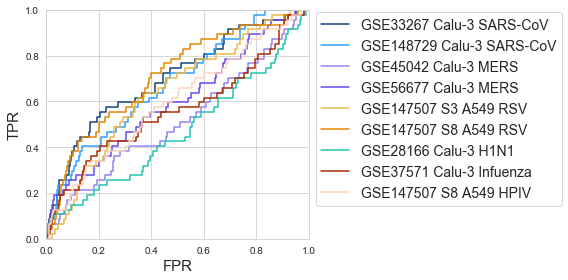

In [87]:
# set color and figsize
plt.figure(figsize=(8,4))
colors = ['#0e4179', '#2D9EF9', '#9581F1', '#6447EE', '#EEB847', '#E48600', '#23C3AD', '#A92A00', '#fcd5bf']
sns.set_palette(sns.color_palette(colors))

# Calculating ROC curves, ROCAUC values and plot
rocaucs_other_viruses = {}
i = 0
for sample in other_samples:
    y_pr = similarity.loc[sample]
    y_tr = pd.Series(0, index=similarity.columns)
    y_tr[effective_drugs] = 1
    fpr, tpr, dummy = roc_curve(y_true=y_tr, y_score=y_pr)
    rocaucs_other_viruses[other_names[i]] = roc_auc_score(y_score=y_pr, y_true=y_tr)
    plt.plot(fpr, tpr, label=sample)
    i= i+1
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR',  fontsize=15)
plt.xlim([0, 1])
plt.ylim([0, 1])
    
plt.legend(other_names, fontsize = 14, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.tight_layout()

In [75]:
pd.DataFrame.from_dict(rocaucs_other_viruses, orient='index').rename(columns={0:'ROC AUC'})\
.sort_values(by=['ROC AUC'], ascending = False).round(3)

,ROC AUC
GSE147507 S8 A549 RSV,0.707
GSE33267 Calu-3 SARS-CoV,0.703
GSE148729 Calu-3 SARS-CoV,0.674
GSE147507 S3 A549 RSV,0.640
GSE56677 Calu-3 MERS,0.599
GSE147507 S8 A549 HPIV,0.595
GSE37571 Calu-3 Infuenza,0.560
GSE45042 Calu-3 MERS,0.515
GSE28166 Calu-3 H1N1,0.467
